In [4]:
#EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
df=pd.read_csv(r"C:\Users\Nandan G\python_practice\ToyotaCorolla - MLR.csv")

In [6]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [7]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [8]:
df.shape

(1436, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [10]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

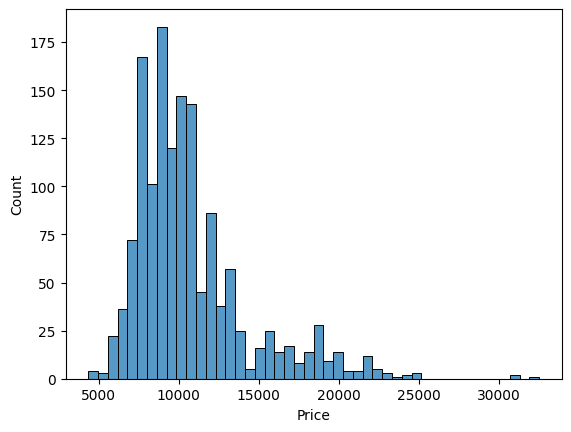

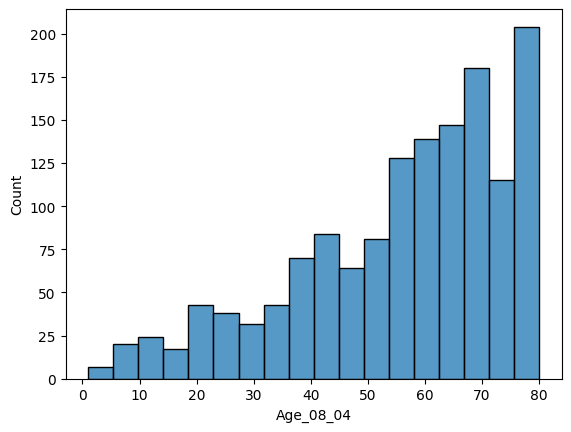

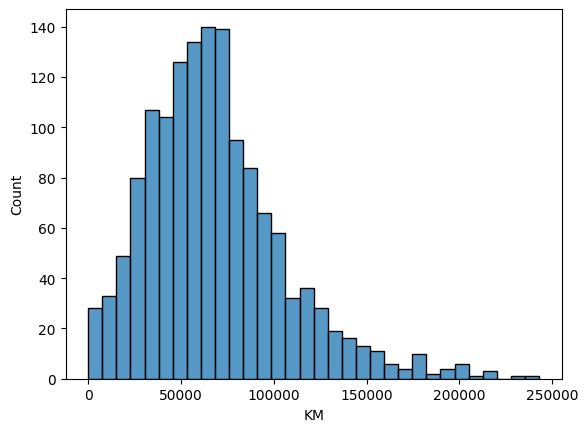

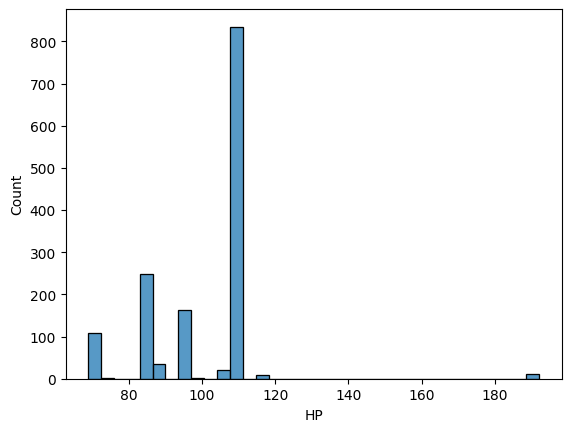

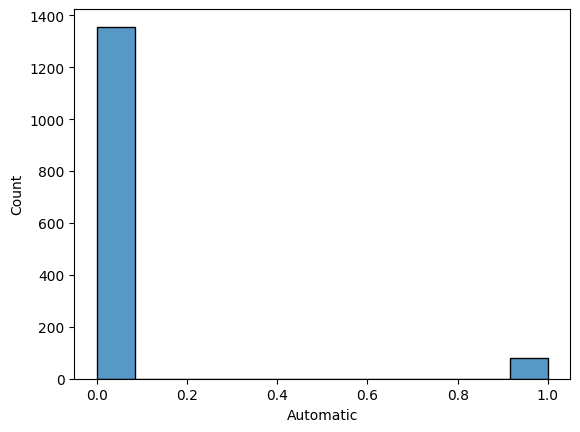

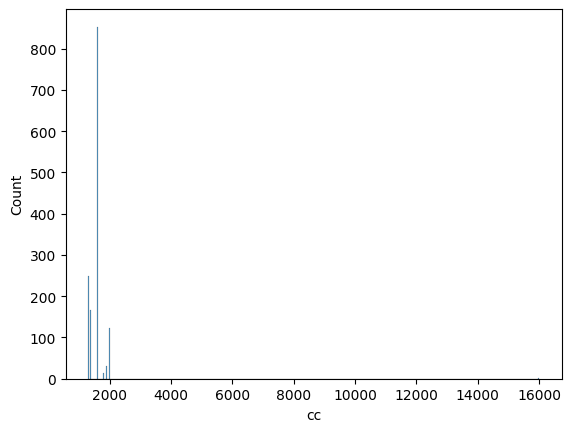

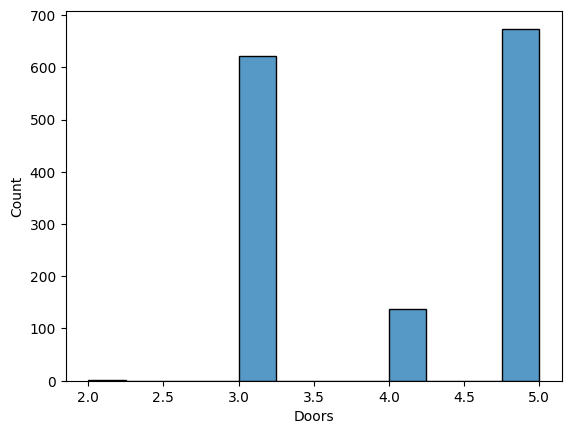

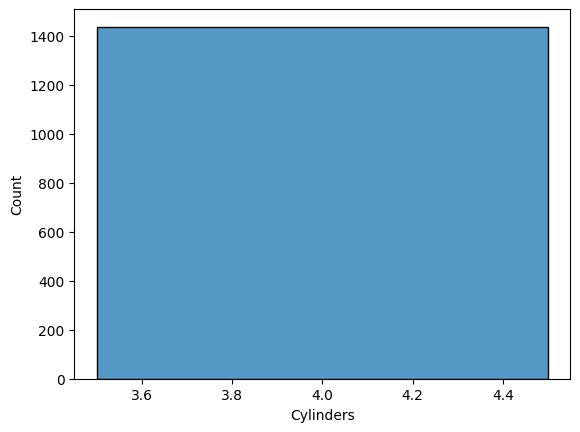

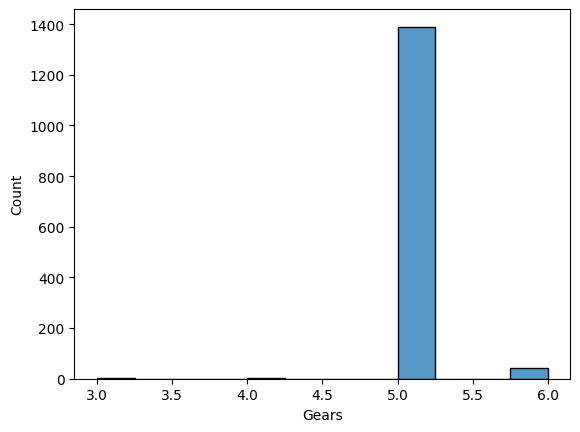

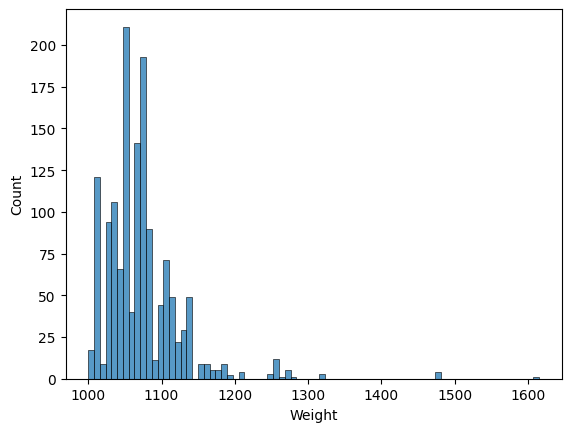

In [11]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

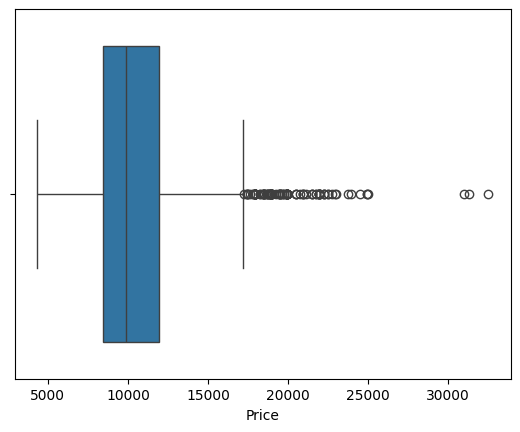

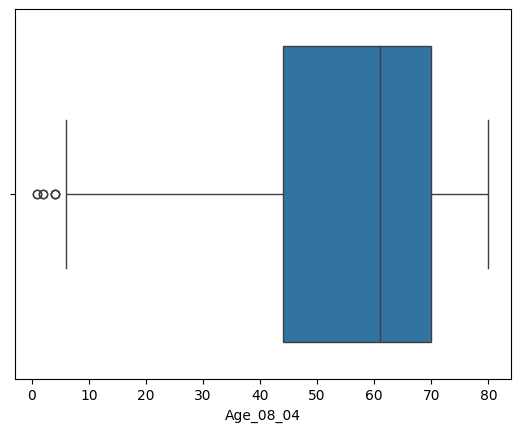

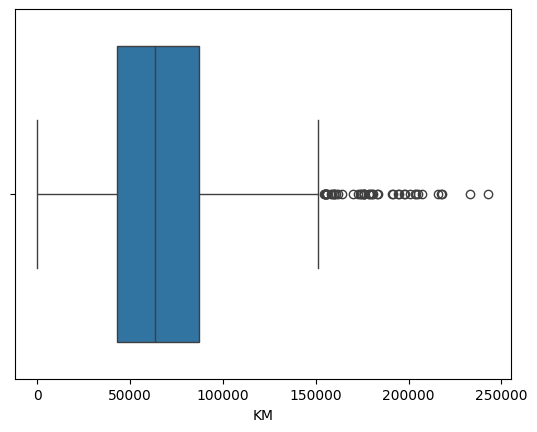

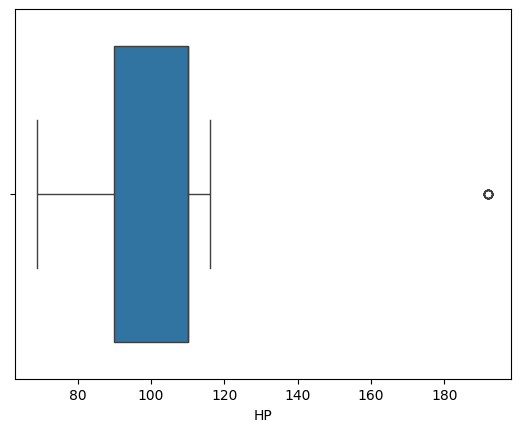

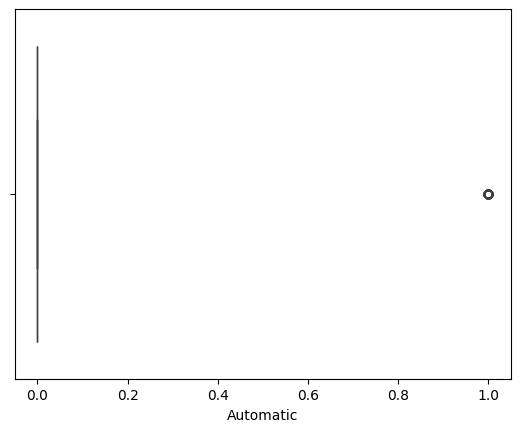

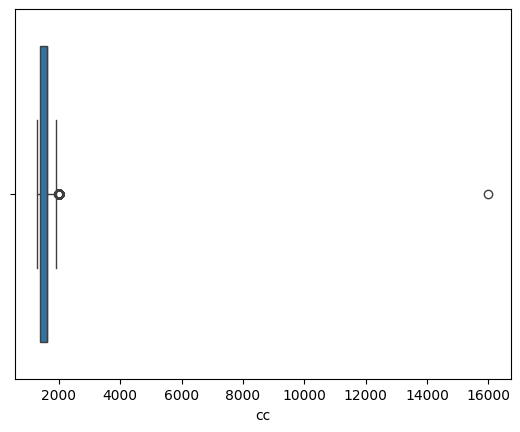

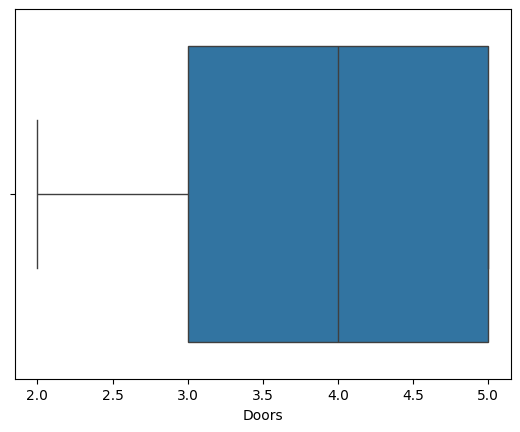

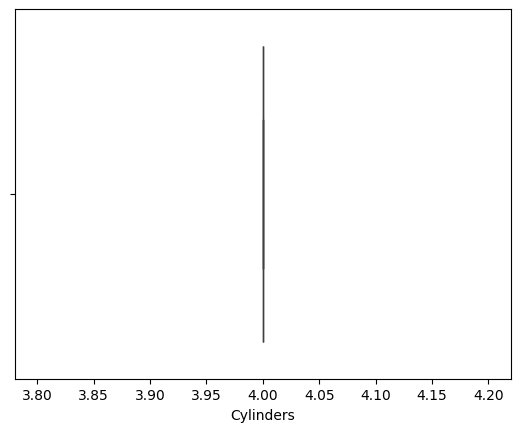

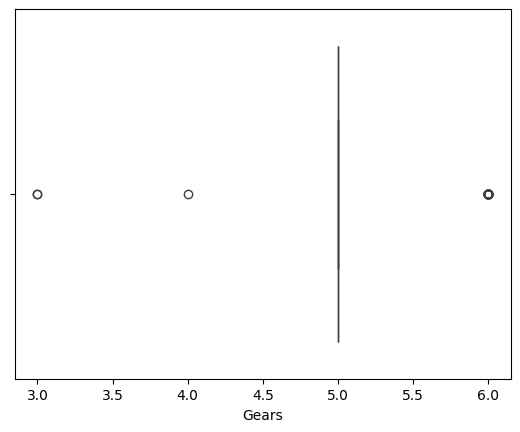

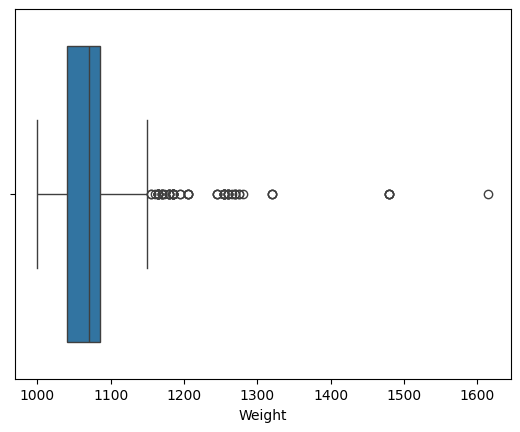

In [12]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [13]:
df.select_dtypes(include="number").columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

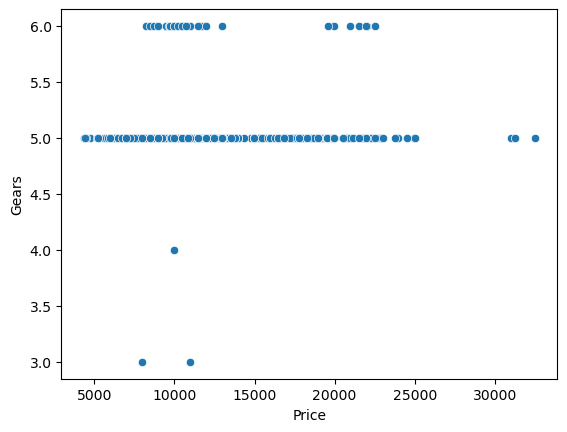

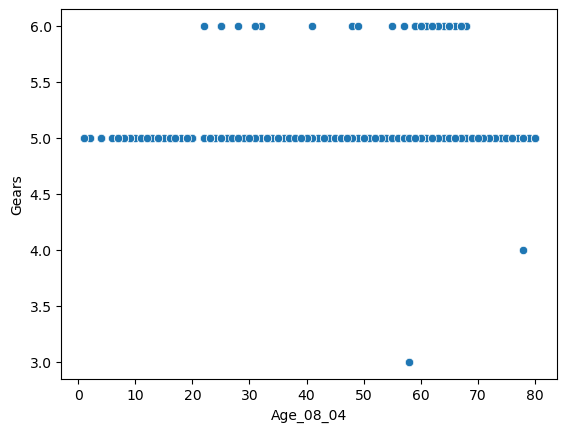

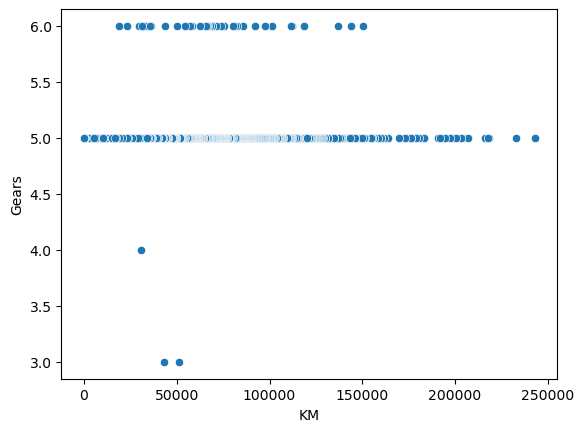

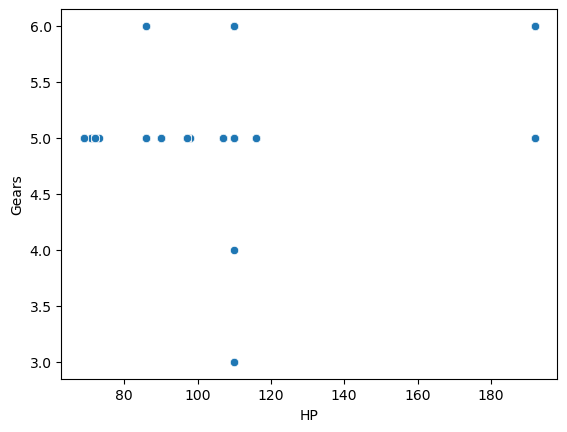

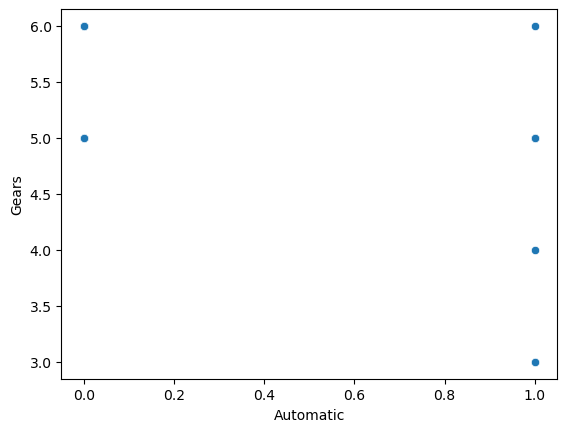

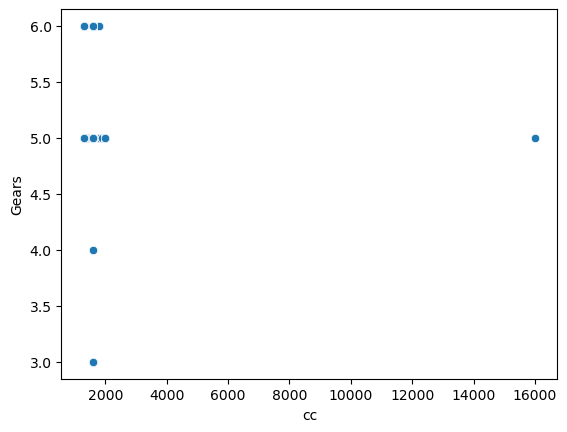

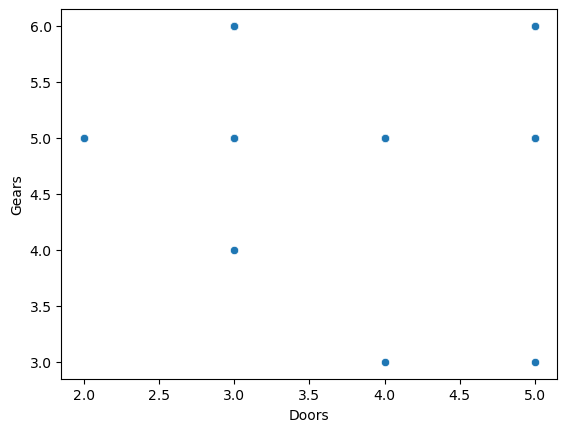

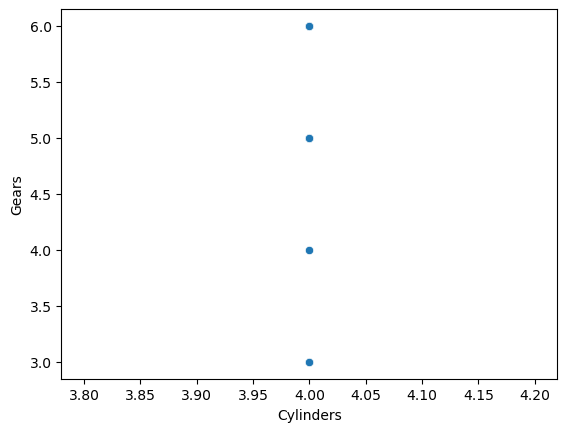

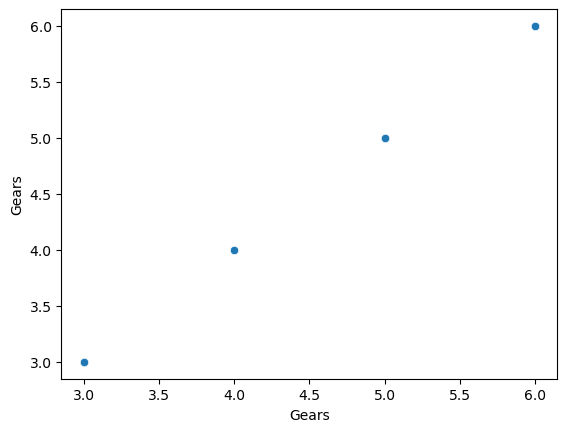

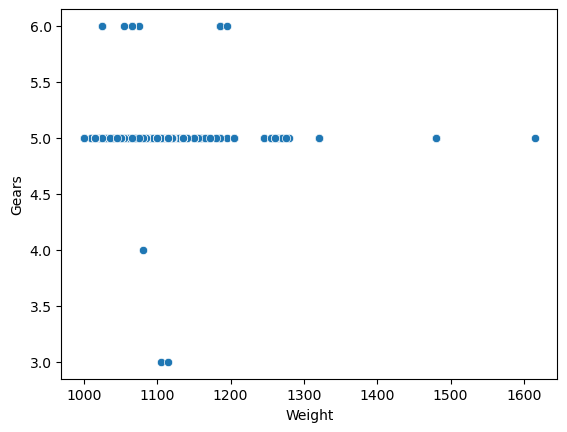

In [ ]:
for i in ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight']:
    sns.scatterplot(data=df,x=i,y="Gears")
    plt.show()

<Axes: >

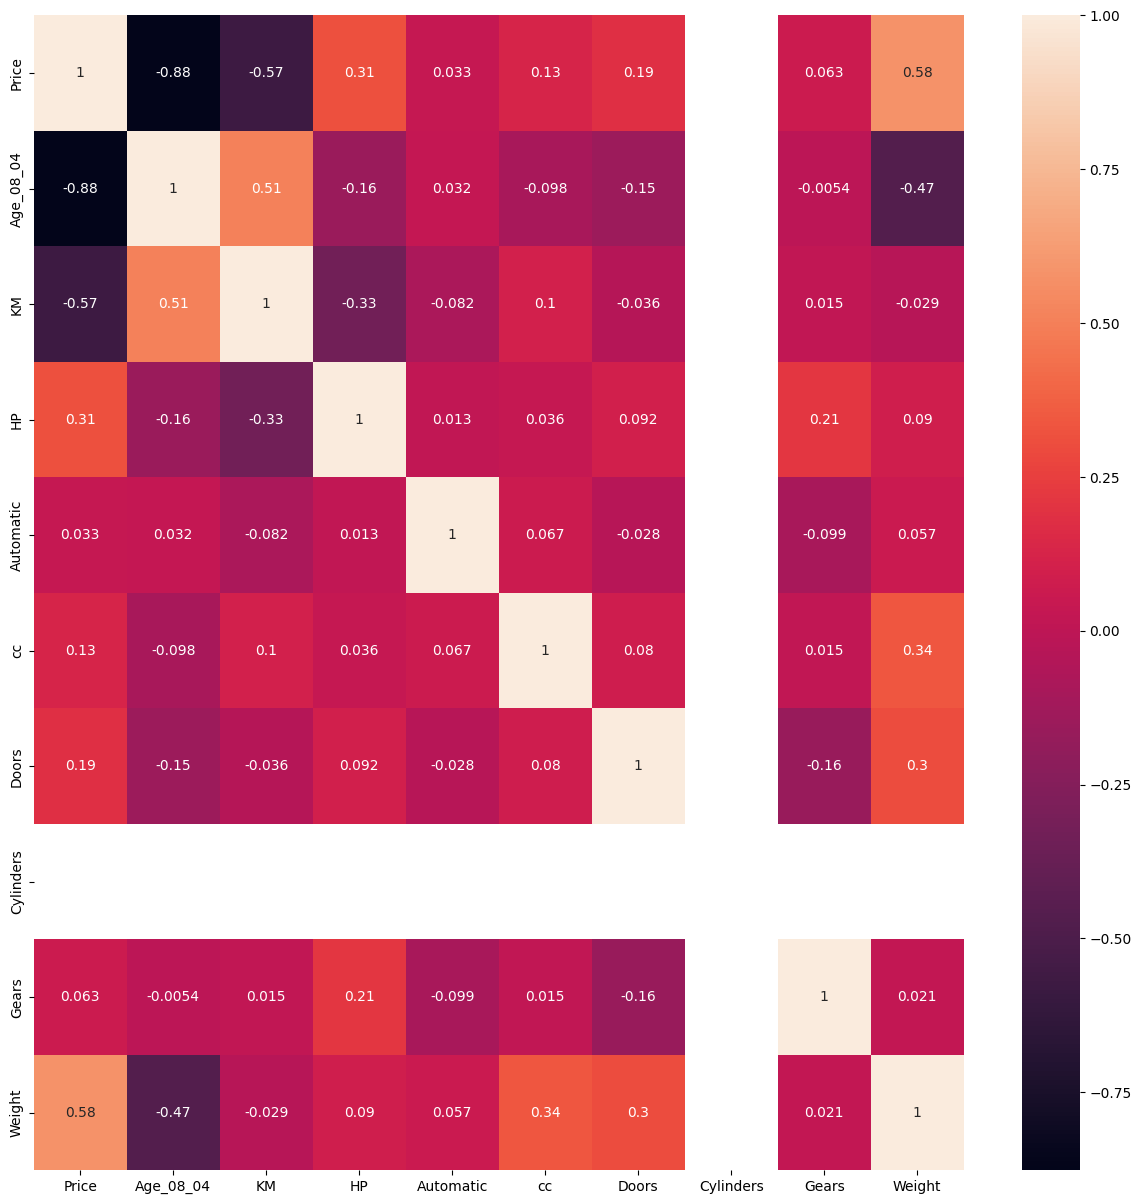

In [14]:
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [15]:
#2.Split the dataset into training and testing sets

In [16]:

import pandas as pd
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 1148 samples
Testing set size: 288 samples


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

In [18]:
columns = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight', 'Price']
df = df[columns]

df = pd.get_dummies(df, drop_first=True)

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Model1
X_train_sm = sm.add_constant(X_train)

model_1 = sm.OLS(y_train, X_train_sm).fit()

print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1042.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:53:30   Log-Likelihood:                -9886.7
No. Observations:                1148   AIC:                         1.979e+04
Df Residuals:                    1140   BIC:                         1.983e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5345.9815   1103.391     -4.845      0.0

In [20]:
#MODEL2

X_train_sm = X_train[['Age_08_04', 'KM', 'HP', 'Automatic', 'Weight']]

X_train_sm = sm.add_constant(X_train_sm)

model_2 = sm.OLS(y_train, X_train_sm).fit()

print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1459.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:53:34   Log-Likelihood:                -9887.6
No. Observations:                1148   AIC:                         1.979e+04
Df Residuals:                    1142   BIC:                         1.982e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5086.0161   1085.067     -4.687      0.0

In [21]:
#MODEL3
X_train['Age_08_04_KM'] = X_train['Age_08_04'] * X_train['KM']
X_train_sm = X_train[['Age_08_04', 'KM', 'HP', 'Automatic', 'Weight', 'Age_08_04_KM']]

X_train_sm = sm.add_constant(X_train_sm)

model_3 = sm.OLS(y_train, X_train_sm).fit()
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1352.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:53:35   Log-Likelihood:                -9834.0
No. Observations:                1148   AIC:                         1.968e+04
Df Residuals:                    1141   BIC:                         1.972e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1993.6412   1076.632     -1.852   

In [22]:
#.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset

In [23]:
X_test_sm_1 = sm.add_constant(X_test)
y_pred_1 = model_1.predict(X_test_sm_1)

X_test_sm_2 = sm.add_constant(X_test[['Age_08_04', 'KM', 'HP', 'Automatic', 'Weight']])
y_pred_2 = model_2.predict(X_test_sm_2)

X_test['Age_08_04_KM'] = X_test['Age_08_04'] * X_test['KM']
X_test_sm_3 = sm.add_constant(X_test[['Age_08_04', 'KM', 'HP', 'Automatic', 'Weight', 'Age_08_04_KM']])
y_pred_3 = model_3.predict(X_test_sm_3)

def evaluate_model(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

print("Model 1: ", evaluate_model(y_test, y_pred_1))
print("Model 2: ", evaluate_model(y_test, y_pred_2))
print("Model 3: ", evaluate_model(y_test, y_pred_3))


Model 1:  (1409.3104250369522, 0.8511438727402657)
Model 2:  (1409.0953035296063, 0.8511893129923557)
Model 3:  (1306.928975056183, 0.8719860318671185)


In [24]:
# Get the coefficients from model_1
print("Coefficients of Model 1: ", model_1.params)

Coefficients of Model 1:  const       -5345.981549
Age_08_04    -120.716275
KM             -0.019742
HP             29.411494
Automatic     308.482427
cc             -0.113118
Doors         -19.308582
Weight         20.000876
dtype: float64


In [25]:
#5.Apply Lasso and Ridge methods on the model.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [29]:
df = pd.read_csv(r"C:\Users\Nandan G\python_practice\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [30]:
df = pd.get_dummies(df, drop_first=True)

In [31]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
# Apply Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can experiment with different alpha values
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f"Lasso RMSE: {lasso_rmse}")
print(f"Lasso R-squared: {lasso_r2}")
print("Lasso Coefficients:", lasso_model.coef_)

Lasso RMSE: 1484.162888918424
Lasso R-squared: 0.8349116135580272
Lasso Coefficients: [-2267.27035325  -611.71048543   208.46018035    34.33563064
   -14.04428476   -57.28823708     0.           109.26803766
  1316.40520977   -21.48431939   457.89124117]


C:\Users\Nandan G\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
Ans:-Normalization transforms the data to a specific range, usually between 0 and 1 or -1 and 1.
and it helps in
-improving performance
-eliminate biases
-improve training stability
-speed up gradient descent

-Standardization scales the data so that it has a mean of 0 and a standard deviation of 1
and it helps in
-improve data quality
-prevent features from dominating
-optimize algorithms
-improve clustering models

2.What techniques can be used to address multicollinearity in multiple linear regression?
Ans- We can use RIDGE REGRESSION, LASSO REGRESSION OR BAYESIAN REGRESSION
